# Import Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pickle
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Read in CSV

In [3]:
ed_df = pd.read_csv('education_data.csv', index_col=False)

In [4]:
ed_df = ed_df.drop(columns=['Unnamed: 0'])

In [5]:
ed_df

,states,pov_estimate_all_ages,90_pct_ci_lower_bound,90_pct_ci_upper_bound,pov_pct_all_ages,pov_estimate_age_0-17,pov_pct_age_0-17,pov_estimate_age_5-17_in_families,pov_pct_age_5-17_in_families,median_household_income,...,total_spending,instruction_spending_per_pupil,instruction_spending,support_services_per_pupil,support_services,avg_score,total_pop,urban_suburban_pop,rural_pop,rural_pct
0,United States,44268996,44022086,44515906,14.0,14115713,19.5,9648486,18.3,57617,...,5.870047e+11,7160.0,3.575787e+11,4107.0,1.994673e+11,266.577954,308745538,249253271,59492267,19.27
1,Alabama,814197,796927,831467,17.2,267674,24.7,185889,23.5,46309,...,6.907539e+09,5257.0,3.865453e+09,3321.0,2.439634e+09,257.686520,4779736,2821804,1957932,41.00
2,Alaska,71916,67813,76019,9.9,24897,13.6,16061,12.3,76144,...,2.327151e+09,9449.0,1.251738e+09,7427.0,9.838770e+08,257.667497,710231,468893,241338,34.00
3,Arizona,1107153,1086482,1127824,16.4,377445,23.6,263614,22.6,53481,...,7.276067e+09,4077.0,3.872250e+09,3105.0,2.913176e+09,262.957457,6392017,5740659,651358,10.00
4,Arkansas,497388,485180,509596,17.2,165724,24.0,112376,22.3,44406,...,4.750938e+09,5539.0,2.658253e+09,3762.0,1.802769e+09,259.955798,2915918,1637589,1278329,44.00
5,California,5527621,5475835,5579407,14.4,1782764,19.9,1242780,19.2,67715,...,7.264124e+10,6849.0,4.258727e+10,4191.0,2.605802e+10,262.520630,37253956,35373606,1880350,5.00
6,Colorado,598378,585017,611739,11.0,166581,13.4,115917,12.8,65718,...,8.519780e+09,5423.0,4.786838e+09,3785.0,3.333043e+09,270.338689,5029196,4332761,696435,14.00
7,Connecticut,342171,330966,353376,9.9,97462,13.1,67644,12.1,73380,...,9.798789e+09,11656.0,6.110631e+09,6621.0,3.307162e+09,272.537711,3574097,3144942,429155,12.00
8,Delaware,109592,104742,114442,11.8,35702,17.7,23942,16.3,62112,...,1.845143e+09,9191.0,1.126775e+09,4852.0,5.881810e+08,263.089090,897934,747949,149985,17.00
9,District of Columbia,119778,113591,125965,18.5,32715,27.6,21997,29.0,74093,...,1.007280e+09,10758.0,5.943960e+08,7637.0,3.691310e+08,246.787755,601723,601723,0,0.00


# EDA

### Columns

In [7]:
list(ed_df.columns)

['states',
 'pov_estimate_all_ages',
 '90_pct_ci_lower_bound',
 '90_pct_ci_upper_bound',
 'pov_pct_all_ages',
 'pov_estimate_age_0-17',
 'pov_pct_age_0-17',
 'pov_estimate_age_5-17_in_families',
 'pov_pct_age_5-17_in_families',
 'median_household_income',
 'pov_estimate_age_0-4',
 'pov_pct_age_0-4',
 'total_per_pupil_spending',
 'total_spending',
 'instruction_spending_per_pupil',
 'instruction_spending',
 'support_services_per_pupil',
 'support_services',
 'avg_score',
 'total_pop',
 'urban_suburban_pop',
 'rural_pop',
 'rural_pct']

In [ ]:
def find_type(columns):
    for x in columns:
        print(columns.dtype)

### Finding Multicolinearity

In [8]:
corr = ed_df.corr()

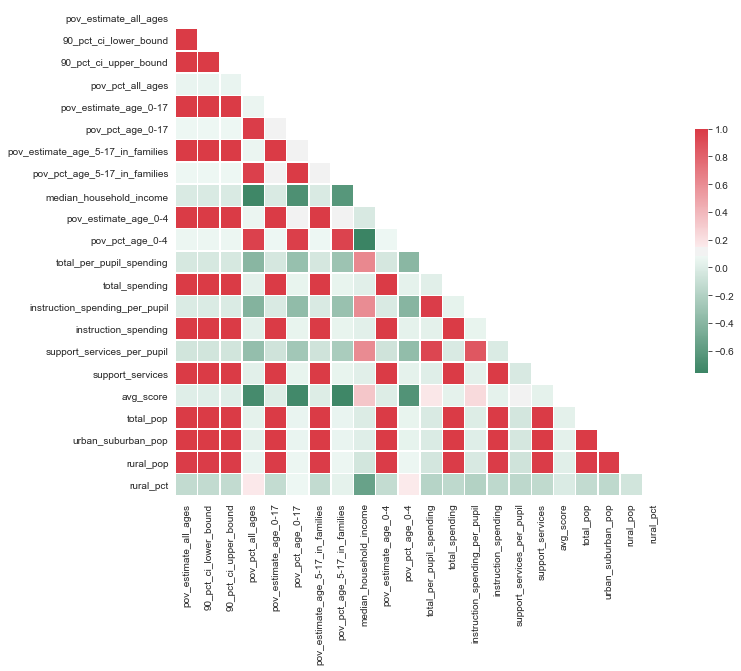

In [9]:
def CorrMtx(df, dropDuplicates = True):
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(150, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

CorrMtx(corr, dropDuplicates = True)

# Test Models

Set dependent variable to "y"<br>
Drop dependent variable column and set to "X"

In [ ]:
y = df[['dep_variable']]
X = df.drop(['dep_variable'], axis=1)

Get train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit training data to linear regression model and set to variable "linreg"

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

Get array of values for predictions from training and test sets

In [ ]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Get prediction results (MSE and RMSE)

In [4]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)
print('Train RMSE:', np.sqrt(mse_train))
print('Test RMSE:', np.sqrt(mse_test))

NameError: name 'linreg' is not defined